In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,adjusted_rand_score,mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Linear Regression

----
linear regression is one of the most widely used regression models. The model seek to identify a linear relationships between the dependent and independent variable(s). It models the expected value of a quantitative response (dependent) variable  from one or more explanatory variables (independent variables). 




# Simple Linear Regression and ordinary least squares (OLS)
----

simple linear regression involves predicting a quantitative response variable from a single explanatory variable


Let consider a simple linear regression to determine how the number of flyers sold on a day relate or determine the Sales of the day defined by
$$Y = \beta_{0} +\beta_{1}x + \epsilon$$ 
where 
<ui>
    <li>ε is a random variable with mean zero </li>
    <li>y=Sales</li>
    <li>x=number of flyers sold</li>
    <li>$\beta_{0} $=the intercept of the line (bias)</li>
    <li>$\beta_{1}$=the slope of the line (weight)</li>
   </ui>
 
 # NOTE
 The intercept and slope are known as the model coefficients or parameters. 

In [14]:
data=pd.read_csv("data/Lemonade.csv")

In [15]:
data.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15


we want to model a simple linear regression using Sales as the response variable and Flyers as the independent variable so are
droping the 'Date', 'Day', 'Temperature', 'Rainfall', 'Price', variables


In [16]:
data.drop(['Date', 'Day', 'Temperature', 'Rainfall', 'Price'],inplace=True,axis=1)

In [17]:
data.head(2)

,Flyers,Sales
0,15,10
1,15,13


Our goal is to predict the expected amount of Sales (y) for the day based on the number of flyers sold defined as

$$E(Y)= \beta_{0} +\beta_{1}x $$ 

In order to be able to predict the expected amount of Sales for a day from the number of flyers sold we need to estimate the parameters $\hat \beta_{0}$ and $\hat \beta_{1}$ such that
$$\hat y=\hat \beta_{0} +\hat \beta_{1}x$$.
where $\hat y $ is the expected prediction for Y (Sales) based on the ith value of X (the number of flyers sold) using the learned parameters.


We choose $\hat \beta_{0}$  and $\hat \beta_{1}$ in such a way that minimize the residual sum of squares (RSS or $SS_{res}$) errors  defined as
$SSR=$SS_{res}=e^{2}=\sum_{i}^{n}(y_{i}-\hat y_{i})^{2}$



$$ \hat \beta_{0}= \bar y -\hat \beta_{1} \bar x$$

$$\hat \beta_{1}=\frac{\sum_{i}^{n}(x_{i}-\bar x) (y_{i}-\bar y)}{\sum_{i}^{n}(x_{i}-\bar x)^{2}}$$

# residual sum of squares
$SSR=SS_{res}=\sum_{i}^{n}(y_{i}-\hat y_{i})^{2}$

# The total sum of squares SST

$$SST =\sum_{i}^{n}(y_{i}- \bar y)^{2} $$

$$ SST= SS_{res} + SS_{reg}$$

# regression sum of squares or explained sum of squares, 
is given by
$$SS_{reg} =\sum_{i}^{n}(\hat y_{i}- \bar y)^{2} $$


# $R^{2}$ Coefficient of determination or measures of fit or goodness fit

is the proportion of the variance in the dependent variable that is predictable or accounted or explained by the independent variable(s). $R^{2}$ normally ranges from 0 to 1 (NB can be negative)  with best possible score being 1.0 

and is defined as

$$R^{2}=1-\frac{SS_{res}}{ SS_{tot}} $$
$$OR$$
$$R^{2}=\frac{SS_{reg}}{ SS_{tot}}=\frac{SS_{reg}/n}{ SS_{tot} / n} $$ 

# The adjusted R-squared
The adjusted R-squared is a modified version of R-squared for the number of predictors in a model. The adjusted R-squared increases only if the added independent variable improves the model and decreases if the added independent variable improves the model by less than expected by chance. 

$$R^{2} \ Adjusted= 1- \frac{ \frac{SS_{res}}{n-p-1}}{ \frac{SS_{tot}}{n-1}  } $$



$$R^{2} \ Adjusted=1-\frac{(1- R^{2})(n-1)}{n-p-1}  $$

where is p is total number of independent (explanatory) variables in the model (not including the constant term or bias), and n is the sample size

# difference between R-squared and the adjusted R-squared
One major difference between R-squared and the adjusted R-squared is that <b>R-squared</b> gives the proportion of variance or percentage of variation in the dependent variable that is accounted for or explained by the independent variables as if all the independent variables in the model really affect the dependent variable. Every independent variable added to a model increases the R-squared and never decreases it


while the <b>adjusted R-squared </b>gives the gives the proportion of variance or percentage of variation explained only the independent variables that really affect the dependent variable, usually lower than the R-squared. The adjusted R2 increases or decreases when the independent variable is added to the model showing how that independent variable affect the dependent variable and is best suited for multiple linear regression.


.

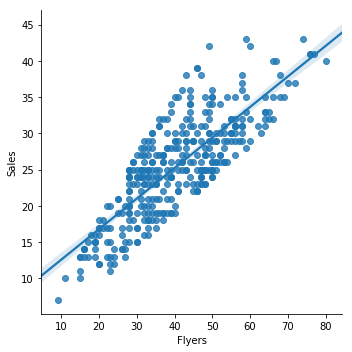

In [18]:
sns.lmplot(x='Flyers',y='Sales',data=data)

from the diagram above there seems to be a positive relationship between flyers and Sales that is increasing the number of flyers sold on a day increases Sales for the day

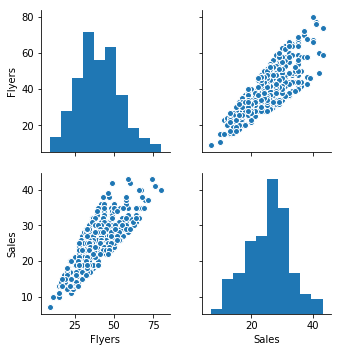

In [20]:
sns.pairplot(data)

In [21]:
data.corr()

,Flyers,Sales
Flyers,1.000000,0.805183
Sales,0.805183,1.000000


spliting the data into training and testing set with 30% for testing

In [22]:
x=np.array(data.iloc[:,0])
x=x.reshape(-1,1)
y=np.array(data.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# instantiating a linear regression object

In [23]:
lrg=LinearRegression()

# fitting our model on the training set

In [24]:
lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
b0=lrg.intercept_
b1=lrg.coef_

In [26]:
print(' the slope or weight parameter of the equaion is ' + str(b1) + ' and the bias intercept is ' + str(b0))

 the slope or weight parameter of the equaion is [0.40608664] and the bias intercept is 9.087245628155436


In [27]:
def expected_Sales(flyer):
    sales=b0 + b1*flyer
    result=print('the expected Sales for ' +str(flyer) + ' flyers sold on a day is ' +str(sales))
    return result

In [28]:
expected_Sales(10)

the expected Sales for 10 flyers sold on a day is [13.14811206]


In [29]:
lrg.score(X_test,y_test)

0.6197222986256711

In [30]:
pred=lrg.predict(X_test)

In [31]:
mean_squared_error(pred,y_test)

19.054395643681033

In [32]:
r2_score(y_pred=pred,y_true=y_test)

0.6197222986256711

In [33]:
adjusted_rand_score(pred,y_test)

0.012258392168968645

# Multiple regression

----- 

Multiple regression is an extension of the principles of simple linear regression to situations in which there are two or more explanatory variables.


Let consider a multiple linear regression to determine how the number of independent variables in the data set relate or help in determining the Revenue of the day defined by
$$Y = \beta_{0} +\beta_{1}x_{1} +\beta_{2}x_{2}+\beta_{3}x_{3}+ \cdots+ \epsilon$$ 
which can be represented compactly using a dot product:

$$Y= \beta X + b$$

we need to estimate the parameters $\hat \beta$ such that
$$\hat y=\hat \beta X$$.

$$\hat y=X\hat \beta=X(X^{T}X)^{-1}X^{T}y $$.

where 
<ui>
    <li>ε is a random variable with mean zero </li>
    <li>y=Revenue</li>
    <li>X=explanatory variables(Month, Day, Temperature, Rainfall, Flyers, Price,Sales)</li>
    <li>$\beta $=parameters of the model</li>
   </ui>
   
   
   $$\hat \beta =(X^{T}X)^{-1}X^{T}y$$

In [34]:
data=pd.read_excel("data/Lemonade.xlsx",parse_dates=True)
data.head(3)

,Date,Month,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
0,2017-01-01,January,Sunday,27.0,2.00,15,0.3,10.0,3.0
1,2017-01-02,January,Monday,28.9,1.33,15,0.3,13.0,3.9
2,2017-01-03,January,Tuesday,34.5,1.33,27,0.3,15.0,4.5


In [35]:
data.drop(['Date'],axis=1,inplace=True)
data.head(3)

,Month,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
0,January,Sunday,27.0,2.00,15,0.3,10.0,3.0
1,January,Monday,28.9,1.33,15,0.3,13.0,3.9
2,January,Tuesday,34.5,1.33,27,0.3,15.0,4.5


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
Month          365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         366 non-null int64
Price          365 non-null float64
Sales          365 non-null float64
Revenue        366 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 23.0+ KB


In [37]:
# percentage of missing values within each field
print('columns----- ---percentage of missing values \n \n',((data.isnull().sum())/len(data))*100)

columns----- ---percentage of missing values 
 
 Month          0.273224
Day            0.273224
Temperature    0.273224
Rainfall       0.273224
Flyers         0.000000
Price          0.273224
Sales          0.273224
Revenue        0.000000
dtype: float64


In [38]:
data.dropna(axis=0,inplace=True)

In [39]:
# percentage of missing values within each field
print('columns----- ---percentage of missing values \n \n',((data.isnull().sum())/len(data))*100)

columns----- ---percentage of missing values 
 
 Month          0.0
Day            0.0
Temperature    0.0
Rainfall       0.0
Flyers         0.0
Price          0.0
Sales          0.0
Revenue        0.0
dtype: float64


In [40]:
data.dtypes

Month           object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales          float64
Revenue        float64
dtype: object

In [41]:
data.Flyers=data.Flyers.astype('float64')

In [42]:
def cat(data,col):
    for i in col:
        data[i]=data[i].astype('category').cat.codes
    return data

In [43]:
col=['Month','Day']
data=cat(data=data,col=col)

# relationship between the numerical independent variables and the response

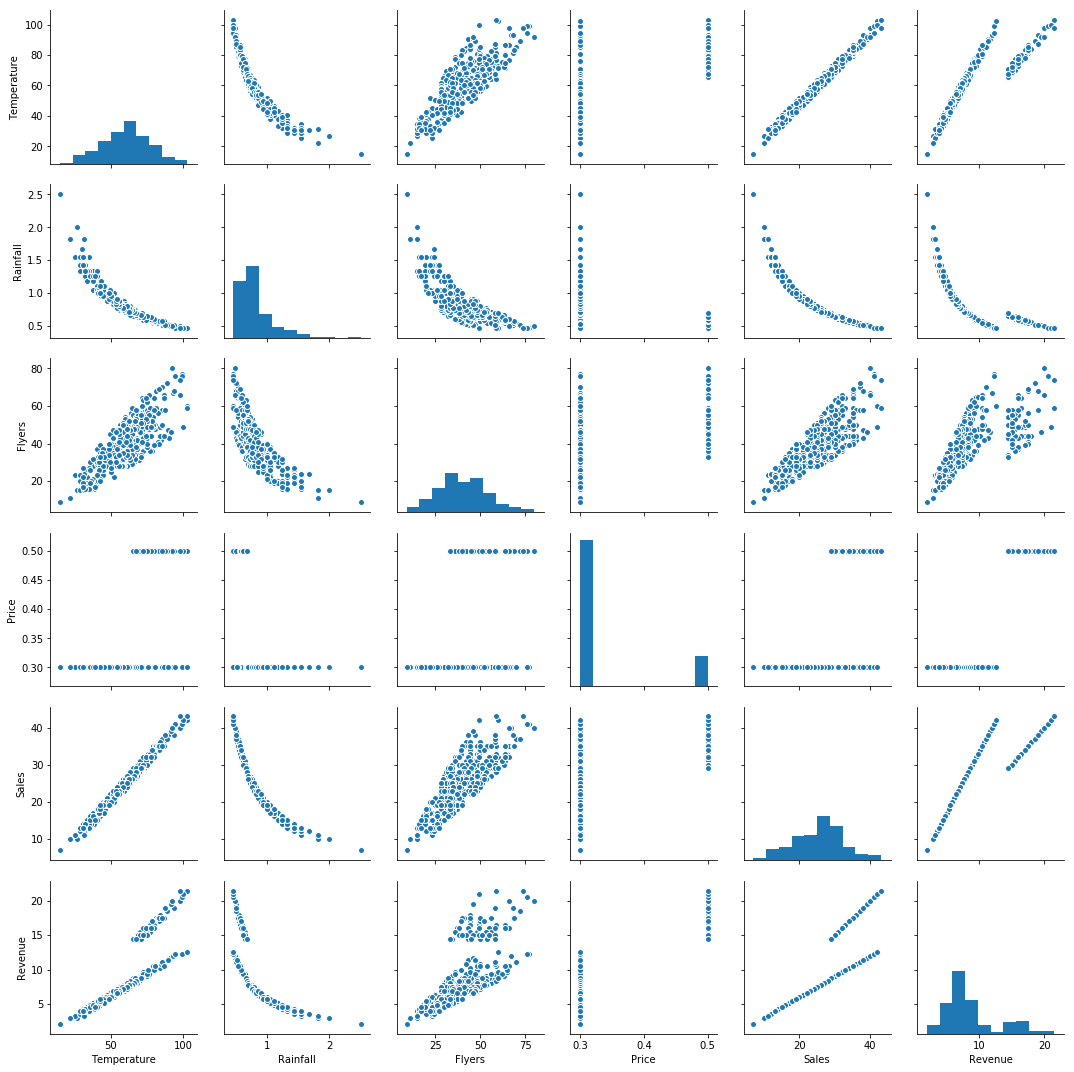

In [45]:
attr = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales','Revenue']
sns.pairplot(data[attr])
plt.show()

In [46]:
data.corr()

,Month,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Month,1.000000,-0.002387,0.141465,-0.216743,0.112638,-0.329168,0.132000,-0.122563
Day,-0.002387,1.000000,-0.004699,-0.008247,0.043464,0.010959,-0.001594,0.002462
Temperature,0.141465,-0.004699,1.000000,-0.902859,0.797719,0.504709,0.989832,0.839314
Rainfall,-0.216743,-0.008247,-0.902859,1.000000,-0.747389,-0.383775,-0.909214,-0.712513
Flyers,0.112638,0.043464,0.797719,-0.747389,1.000000,0.405437,0.805183,0.678700
Price,-0.329168,0.010959,0.504709,-0.383775,0.405437,1.000000,0.512908,0.884179
Sales,0.132000,-0.001594,0.989832,-0.909214,0.805183,0.512908,1.000000,0.849568
Revenue,-0.122563,0.002462,0.839314,-0.712513,0.678700,0.884179,0.849568,1.000000


In [47]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [48]:
def min_max(data):
    return data.apply(lambda x: (x-min(x))/(max(x)-min(x)))
x=min_max(x)    

In [49]:
x.head(3)

,Month,Day,Temperature,Rainfall,Flyers,Price,Sales
0,0.363636,0.500000,0.135535,0.753695,0.084507,0.0,0.083333
1,0.363636,0.166667,0.157175,0.423645,0.084507,0.0,0.166667
2,0.363636,0.833333,0.220957,0.423645,0.253521,0.0,0.222222


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
m_lrg=LinearRegression(fit_intercept=True)

In [52]:
m_lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
m_lrg.score(X_test,y_test)

0.9951684956694857

In [54]:
m_pred=m_lrg.predict(X_test)

In [55]:
mean_squared_error(m_pred,y_test)

0.08074637237648268

In [63]:
dt=pd.DataFrame({"Predicted Revenue":m_pred,'true_Revenue':y_test})

In [64]:
dt

,Predicted Revenue,true_Revenue
193,16.558194,16.5
33,6.157094,6.3
15,3.806254,3.6
309,6.624496,6.6
57,5.918103,6.0
...,...,...
158,12.005865,11.7
229,15.238453,14.5
360,5.492528,5.7
209,17.236669,17.5
